In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [2]:
rate = 'Fixed_Rate'

In [3]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad['MgSO4 Salt Mass E'] = peakLoad['Peak Load']/0.75
peakLoad['MgSO4 Salt Mass P'] = peakLoad['Peak Load']/0.281267306
peakLoad['MgSO4 Salt Mass'] = peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
peakLoad['e cap - MgSO4'] = peakLoad['MgSO4 Salt Mass']*0.75
peakLoad = peakLoad.drop(['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E'], axis=1)

peakLoad['e cap - MgSO4'] = peakLoad['MgSO4 Salt Mass']*0.75

peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,e cap - MgSO4
0,1,27.724174,58015.584978,0.238881,98.568777,73.926583
1,2,20.164945,41411.346548,0.234433,71.693170,53.769878
2,3,18.771555,36953.435376,0.224725,66.739200,50.054400
3,4,16.617412,31673.736508,0.217586,59.080496,44.310372
4,5,27.902137,59150.390389,0.242000,99.201496,74.401122
...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,32.503509
396,397,12.662940,24918.728631,0.224640,45.021018,33.765763
397,398,4.833286,7854.976581,0.185523,17.183958,12.887969
398,399,14.577960,28841.437895,0.225848,51.829559,38.872169


In [4]:
# Total costs:
cost_noTES = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_ref = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'Opt_Size' + '_MgSO4'+'.xlsx')
cost_Const100 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'SA_Constant_100'+'.xlsx')
cost_Const10 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'SA_Constant_10'+'.xlsx')
cost_ConstPeak = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + 'SA_Constant_Peak'+'.xlsx')

# Clean up:
cost_noTES = cost_noTES.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES = cost_noTES.sort_values(by=['building id'])
cost_noTES = cost_noTES.reset_index()
cost_noTES = cost_noTES[['building id', 'total cost ($)']]

cost_ref = cost_ref.rename(columns={'Unnamed: 0': 'building id'})
cost_ref = cost_ref.sort_values(by=['building id'])
cost_ref = cost_ref.reset_index()
cost_ref = cost_ref[['building id', 'total cost ($)']]

cost_Const100 = cost_Const100.rename(columns={'Unnamed: 0': 'building id'})
cost_Const100 = cost_Const100.sort_values(by=['building id'])
cost_Const100 = cost_Const100.reset_index()
cost_Const100 = cost_Const100[['building id', 'total cost ($)']]

cost_Const10 = cost_Const10.rename(columns={'Unnamed: 0': 'building id'})
cost_Const10 = cost_Const10.sort_values(by=['building id'])
cost_Const10 = cost_Const10.reset_index()
cost_Const10 = cost_Const10[['building id', 'total cost ($)']]

cost_ConstPeak = cost_ConstPeak.rename(columns={'Unnamed: 0': 'building id'})
cost_ConstPeak = cost_ConstPeak.sort_values(by=['building id'])
cost_ConstPeak = cost_ConstPeak.reset_index()
cost_ConstPeak = cost_ConstPeak[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES['building id']
cost_impacts_TES['total cost - no TES'] = cost_noTES['total cost ($)']
cost_impacts_TES['total cost - Ref'] = cost_ref['total cost ($)']
cost_impacts_TES['total cost - Constant 100'] = cost_Const100['total cost ($)']
cost_impacts_TES['total cost - Constant 10'] = cost_Const10['total cost ($)']
cost_impacts_TES['total cost - Constant Peak'] = cost_ConstPeak['total cost ($)']

cost_impacts_TES['cost saving - Ref'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Ref']
cost_impacts_TES['cost saving % - Ref'] = cost_impacts_TES['cost saving - Ref']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - Constant 100'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Constant 100']
cost_impacts_TES['cost saving % - Constant 100'] = cost_impacts_TES['cost saving - Constant 100']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - Constant 10'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Constant 10']
cost_impacts_TES['cost saving % - Constant 10'] = cost_impacts_TES['cost saving - Constant 10']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - Constant Peak'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - Constant Peak']
cost_impacts_TES['cost saving % - Constant Peak'] = cost_impacts_TES['cost saving - Constant Peak']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['peak load'] = peakLoad['Peak Load']
cost_impacts_TES

,building id,total cost - no TES,total cost - Ref,total cost - Constant 100,total cost - Constant 10,total cost - Constant Peak,cost saving - Ref,cost saving % - Ref,cost saving - Constant 100,cost saving % - Constant 100,cost saving - Constant 10,cost saving % - Constant 10,cost saving - Constant Peak,cost saving % - Constant Peak,peak load
0,1,3526.290877,3411.853730,3406.738627,3498.077221,3394.516465,114.437147,0.032453,119.552250,0.033903,28.213656,0.008001,131.774412,0.037369,27.724174
1,2,2523.385394,2439.361398,2435.615494,2502.247069,2426.987436,84.023996,0.033298,87.769900,0.034783,21.138325,0.008377,96.397958,0.038202,20.164945
2,3,2254.533101,2175.504185,2172.015786,2235.095724,2163.358878,79.028916,0.035053,82.517315,0.036601,19.437377,0.008621,91.174224,0.040440,18.771555
3,4,1938.359969,1868.762140,1865.620967,1921.019698,1858.294860,69.597829,0.035906,72.739002,0.037526,17.340272,0.008946,80.065109,0.041306,16.617412
4,5,3591.834993,3476.731842,3471.435097,3563.715631,3458.649302,115.103151,0.032046,120.399895,0.033520,28.119362,0.007829,133.185691,0.037080,27.902137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,1385.027235,1424.614051,1380.282825,49.592401,0.034513,51.892888,0.036114,12.306072,0.008564,56.637298,0.039416,12.189566
396,397,1535.499790,1487.147655,1485.078121,1523.093893,1480.087763,48.352134,0.031490,50.421669,0.032837,12.405897,0.008079,55.412026,0.036087,12.662940
397,398,491.584576,473.586949,472.824911,486.936046,471.116299,17.997627,0.036611,18.759666,0.038162,4.648531,0.009456,20.468278,0.041637,4.833286
398,399,1766.304961,1707.027850,1704.398327,1751.604532,1698.222579,59.277111,0.033560,61.906634,0.035049,14.700429,0.008323,68.082381,0.038545,14.577960


In [5]:
# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()
diff_all_cost_Ref = cost_impacts_TES["cost saving - Ref"].sum()
diff_all_cost_Constant100 = cost_impacts_TES["cost saving - Constant 100"].sum()
diff_all_cost_Constant10 = cost_impacts_TES["cost saving - Constant 10"].sum()
diff_all_cost_ConstantPeak = cost_impacts_TES["cost saving - Constant Peak"].sum()

pct_cost_saving_Ref = diff_all_cost_Ref/tot_cost_noTES
pct_cost_saving_Constant100 = diff_all_cost_Constant100/tot_cost_noTES
pct_cost_saving_Constant10 = diff_all_cost_Constant10/tot_cost_noTES
pct_cost_saving_ConstantPeak = diff_all_cost_ConstantPeak/tot_cost_noTES

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])


In [6]:
cost_impacts_TES['saving per kg - Ref'] = cost_impacts_TES['cost saving - Ref']/cost_impacts_TES['MgSO4 Salt Mass']
cost_impacts_TES['saving per kg - Constant Peak'] = cost_impacts_TES['cost saving - Constant Peak']/cost_impacts_TES['MgSO4 Salt Mass']
cost_impacts_TES['saving per kg - Constant 100'] = cost_impacts_TES['cost saving - Constant 100']/cost_impacts_TES['MgSO4 Salt Mass']
cost_impacts_TES['saving per kg - Constant 10'] = cost_impacts_TES['cost saving - Constant 10']/cost_impacts_TES['MgSO4 Salt Mass']

cost_impacts_TES['peak load'] = peakLoad['Peak Load']
cost_impacts_TES


,building id,total cost - no TES,total cost - Ref,total cost - Constant 100,total cost - Constant 10,total cost - Constant Peak,cost saving - Ref,cost saving % - Ref,cost saving - Constant 100,cost saving % - Constant 100,...,peak load,Peak Load,Load,Load Factor,MgSO4 Salt Mass,e cap - MgSO4,saving per kg - Ref,saving per kg - Constant Peak,saving per kg - Constant 100,saving per kg - Constant 10
0,1,3526.290877,3411.853730,3406.738627,3498.077221,3394.516465,114.437147,0.032453,119.552250,0.033903,...,27.724174,27.724174,58015.584978,0.238881,98.568777,73.926583,1.160988,1.336878,1.212882,0.286233
1,2,2523.385394,2439.361398,2435.615494,2502.247069,2426.987436,84.023996,0.033298,87.769900,0.034783,...,20.164945,20.164945,41411.346548,0.234433,71.693170,53.769878,1.171994,1.344591,1.224244,0.294844
2,3,2254.533101,2175.504185,2172.015786,2235.095724,2163.358878,79.028916,0.035053,82.517315,0.036601,...,18.771555,18.771555,36953.435376,0.224725,66.739200,50.054400,1.184145,1.366127,1.236415,0.291244
3,4,1938.359969,1868.762140,1865.620967,1921.019698,1858.294860,69.597829,0.035906,72.739002,0.037526,...,16.617412,16.617412,31673.736508,0.217586,59.080496,44.310372,1.178017,1.355187,1.231185,0.293502
4,5,3591.834993,3476.731842,3471.435097,3563.715631,3458.649302,115.103151,0.032046,120.399895,0.033520,...,27.902137,27.902137,59150.390389,0.242000,99.201496,74.401122,1.160297,1.342577,1.213690,0.283457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1436.920123,1387.327722,1385.027235,1424.614051,1380.282825,49.592401,0.034513,51.892888,0.036114,...,12.189566,12.189566,23415.204886,0.219283,43.338012,32.503509,1.144316,1.306873,1.197399,0.283956
396,397,1535.499790,1487.147655,1485.078121,1523.093893,1480.087763,48.352134,0.031490,50.421669,0.032837,...,12.662940,12.662940,24918.728631,0.224640,45.021018,33.765763,1.073990,1.230804,1.119958,0.275558
397,398,491.584576,473.586949,472.824911,486.936046,471.116299,17.997627,0.036611,18.759666,0.038162,...,4.833286,4.833286,7854.976581,0.185523,17.183958,12.887969,1.047350,1.191127,1.091696,0.270516
398,399,1766.304961,1707.027850,1704.398327,1751.604532,1698.222579,59.277111,0.033560,61.906634,0.035049,...,14.577960,14.577960,28841.437895,0.225848,51.829559,38.872169,1.143693,1.313582,1.194427,0.283630


In [7]:
# Dot plot:
ordered_cost_reset = cost_impacts_TES.sort_values(by='peak load')
ordered_cost_reset = ordered_cost_reset.reset_index()
ordered_cost_reset['building'] = ordered_cost_reset.index + 1
ordered_cost_reset

,index,building id,total cost - no TES,total cost - Ref,total cost - Constant 100,total cost - Constant 10,total cost - Constant Peak,cost saving - Ref,cost saving % - Ref,cost saving - Constant 100,...,Peak Load,Load,Load Factor,MgSO4 Salt Mass,e cap - MgSO4,saving per kg - Ref,saving per kg - Constant Peak,saving per kg - Constant 100,saving per kg - Constant 10,building
0,304,305,280.292317,269.204534,268.734214,277.471894,267.640757,11.087784,0.039558,11.558103,...,2.931349,4494.552000,0.175031,10.421934,7.816450,1.063889,1.213936,1.109017,0.270624,1
1,210,211,320.706929,306.432181,305.774648,316.926604,304.763850,14.274748,0.044510,14.932280,...,3.267824,5129.930228,0.179204,11.618214,8.713661,1.228653,1.372249,1.285247,0.325379,2
2,233,234,302.507901,288.808238,288.171196,298.875046,287.165011,13.699663,0.045287,14.336705,...,3.335892,4804.581801,0.164414,11.860219,8.895165,1.155094,1.293643,1.208806,0.306306,3
3,338,339,351.177610,336.725184,336.070590,347.369286,335.009374,14.452427,0.041154,15.107020,...,3.346160,5666.573658,0.193317,11.896726,8.922544,1.214824,1.359049,1.269847,0.320115,4
4,99,100,439.196709,421.669956,420.801578,434.730175,419.399737,17.526753,0.039906,18.395131,...,4.456120,7017.284235,0.179766,15.843009,11.882257,1.106277,1.249572,1.161088,0.281925,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,386,3466.234461,3356.766936,3351.815733,3439.154251,3340.132905,109.467525,0.031581,114.418728,...,27.341019,56719.004778,0.236815,97.206532,72.904899,1.126133,1.297254,1.177068,0.278584,396
396,0,1,3526.290877,3411.853730,3406.738627,3498.077221,3394.516465,114.437147,0.032453,119.552250,...,27.724174,58015.584978,0.238881,98.568777,73.926583,1.160988,1.336878,1.212882,0.286233,397
397,4,5,3591.834993,3476.731842,3471.435097,3563.715631,3458.649302,115.103151,0.032046,120.399895,...,27.902137,59150.390389,0.242000,99.201496,74.401122,1.160297,1.342577,1.213690,0.283457,398
398,399,400,3539.585834,3424.820699,3419.617934,3511.470440,3407.360457,114.765136,0.032423,119.967900,...,28.411462,57919.433045,0.232716,101.012317,75.759238,1.136150,1.309003,1.187656,0.278336,399


In [9]:
ordered_cost_reset.mean()*20*0.75

index                              2992.500000
building id                        3007.500000
total cost - no TES               22174.579995
total cost - Ref                  21403.879197
total cost - Constant 100         21368.664334
total cost - Constant 10          21982.327302
total cost - Constant Peak        21290.805761
cost saving - Ref                   770.700798
cost saving % - Ref                   0.534347
cost saving - Constant 100          805.915661
cost saving % - Constant 100          0.558827
cost saving - Constant 10           192.252692
cost saving % - Constant 10           0.133920
cost saving - Constant Peak         883.774234
cost saving % - Constant Peak         0.611499
peak load                           188.110941
Peak Load                           188.110941
Load                             362000.507374
Load Factor                           3.219006
MgSO4 Salt Mass                     668.797748
e cap - MgSO4                       501.598311
saving per kg

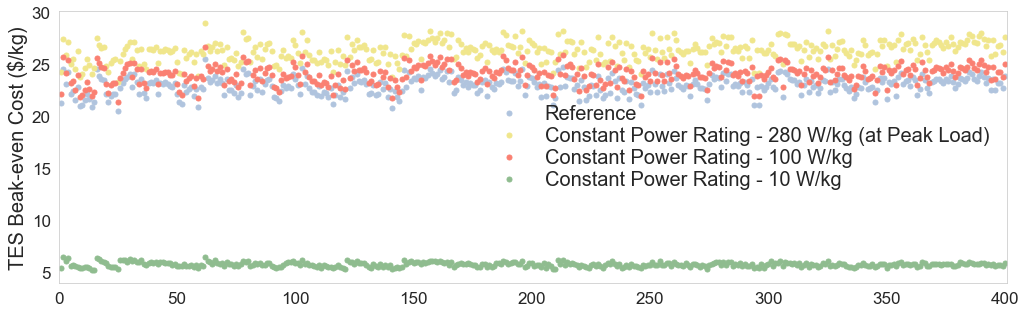

In [20]:

fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - Ref']*20, marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='Reference')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - Constant Peak']*20, marker='o', ms=5, linestyle='',color = 'khaki', label='Constant Power Rating - 280 W/kg (at Peak Load)')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - Constant 100']*20, marker='o', ms=5, linestyle='',color = 'salmon', label='Constant Power Rating - 100 W/kg')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - Constant 10']*20, marker='o', ms=5, linestyle='',color = 'darkseagreen', label='Constant Power Rating - 10 W/kg')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
#plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("TES Beak-even Cost ($/kg)", fontsize=20)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, handleheight=0.5, labelspacing=0.15, loc='center right', frameon=False)
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_SA_kg.png', dpi=300, bbox_inches='tight')

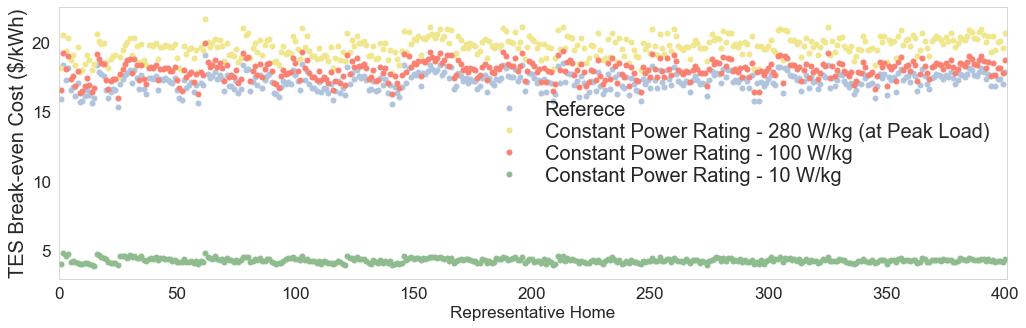

In [19]:

fig, ax = plt.subplots(figsize=(17,5))

ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - Ref']*0.75*20, marker='o', ms=5, linestyle='',color = 'lightsteelblue', label='Referece')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - Constant Peak']*20*0.75, marker='o', ms=5, linestyle='',color = 'khaki', label='Constant Power Rating - 280 W/kg (at Peak Load)')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - Constant 100']*20*0.75, marker='o', ms=5, linestyle='',color = 'salmon', label='Constant Power Rating - 100 W/kg')
ax.plot(ordered_cost_reset['building'], ordered_cost_reset['saving per kg - Constant 10']*20*0.75, marker='o', ms=5, linestyle='',color = 'darkseagreen', label='Constant Power Rating - 10 W/kg')

ax.yaxis.set_visible(True)
ax.grid(False)
ax.set_xlim(0, 401)
plt.xlabel("Representative Home",fontsize=17)
plt.ylabel("TES Break-even Cost ($/kWh)", fontsize=20)
#ax.set_xticks(range(min(ordered_cost['building id']), max(ordered_cost['building id'])))
ax.tick_params(length=0, pad=8, labelsize=17)
ax.legend(fontsize=20, labelspacing=0.15, frameon=False)
fig.savefig('C:/Users/atpha/Documents/Postdocs/Projects/TES/Draft/images/cost_saving_SA_kWh.png', dpi=300, bbox_inches='tight')

In [25]:
cost_impacts_TES.min()

building id                 1.000000
total cost - no TES       279.896444
total cost - MgSO4        268.409223
total cost - MgCl2        269.389860
total cost - K2CO3        273.977744
total cost - SrBr2        273.992065
cost saving - MgSO4        11.487221
cost saving % - MgSO4       0.029265
cost saving - MgCl2        10.506584
cost saving % - MgCl2       0.026766
cost saving - K2CO3         5.918700
cost saving % - K2CO3       0.014878
cost saving - SrBr2         5.904379
cost saving % - SrBr2       0.014939
Peak Load                   2.931349
Load                     4494.552000
Load Factor                 0.164414
MgSO4 Salt Mass            10.421934
MgCl2 Salt Mass            34.580891
K2CO3 Salt Mass            15.750543
SrBr2 Salt Mass             8.243389
saving per kg - MgSO4       1.064294
saving per kg - MgCl2       0.293884
saving per kg - K2CO3       0.362988
saving per kg - SrBr2       0.692287
dtype: float64

In [26]:
cost_impacts_TES.mean()

building id                200.500000
total cost - no TES       1472.574929
total cost - MgSO4        1420.490996
total cost - MgCl2        1424.864774
total cost - K2CO3        1445.676493
total cost - SrBr2        1445.692125
cost saving - MgSO4         52.083933
cost saving % - MgSO4        0.036353
cost saving - MgCl2         47.710155
cost saving % - MgCl2        0.033301
cost saving - K2CO3         26.898436
cost saving % - K2CO3        0.018783
cost saving - SrBr2         26.882804
cost saving % - SrBr2        0.018770
Peak Load                   12.540729
Load                     24133.367158
Load Factor                  0.214600
MgSO4 Salt Mass             44.586517
MgCl2 Salt Mass            147.941975
K2CO3 Salt Mass             67.383064
SrBr2 Salt Mass             35.266393
saving per kg - MgSO4        1.168355
saving per kg - MgCl2        0.322556
saving per kg - K2CO3        0.399406
saving per kg - SrBr2        0.762609
dtype: float64

In [27]:
cost_impacts_TES.max()

building id                400.000000
total cost - no TES       3850.323382
total cost - MgSO4        3718.653522
total cost - MgCl2        3729.672282
total cost - K2CO3        3782.720577
total cost - SrBr2        3782.912201
cost saving - MgSO4        131.669861
cost saving % - MgSO4        0.047366
cost saving - MgCl2        120.651101
cost saving % - MgCl2        0.043473
cost saving - K2CO3         67.602806
cost saving % - K2CO3        0.024722
cost saving - SrBr2         67.411181
cost saving % - SrBr2        0.024679
Peak Load                   30.477053
Load                     63936.968704
Load Factor                  0.280478
MgSO4 Salt Mass            108.356189
MgCl2 Salt Mass            359.535345
K2CO3 Salt Mass            163.757399
SrBr2 Salt Mass             85.705999
saving per kg - MgSO4        1.270532
saving per kg - MgCl2        0.351608
saving per kg - K2CO3        0.441544
saving per kg - SrBr2        0.841774
dtype: float64